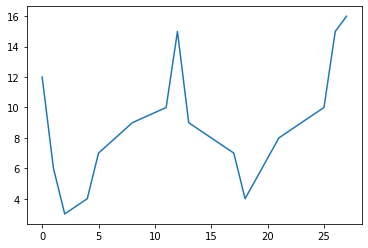

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

# get data
raw_data = np.array([
    [0, 12],
    [1, 6],
    [2, 3],
    [4, 4],
    [5, 7],
    [8, 9],
    [11, 10],
    [12, 15],
    [13, 9],
    [17, 7],
    [18, 4],
    [21, 8],
    [25, 10],
    [26, 15],
    [27, 16],
])
plt.plot(raw_data[:, 0], raw_data[:, 1])
plt.show()

# Prepare train data

## Normalize data

In [32]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
train_data = normalizer.fit_transform(raw_data[:, :1])
# train_label = sc.transform(label)
train_data = train_data.reshape(-1)

In [47]:
data_len = 3
data_label_len = 2
window_size = 2

def split_raw(raw_data, data_len=3, data_label_len=2, window_size=2):
    value = []
    label = []
    index = 0
    while index + (data_len + data_label_len) < len(raw_data):
        value += [raw_data[index: index + data_len]]
        label += [raw_data[index + data_len: index + data_len + data_label_len]]
        index += window_size
    value = np.array(value).reshape((-1, len(value[0]), 1))
    label = np.array(label)
    return value, label

value, label = split_raw(train_data)

In [48]:
value

array([[[0.        ],
        [0.03703704],
        [0.07407407]],

       [[0.07407407],
        [0.14814815],
        [0.18518519]],

       [[0.18518519],
        [0.2962963 ],
        [0.40740741]],

       [[0.40740741],
        [0.44444444],
        [0.48148148]],

       [[0.48148148],
        [0.62962963],
        [0.66666667]]])

In [57]:
# import packages
# create a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras.optimizers import SGD

def LSTM_model(X_train, y_train, normalizer):
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compile model
    my_LSTM_model.compile(optimizer=SGD(lr=0.001, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fit training set
    my_LSTM_model.fit(X_train, y_train, epochs=100, verbose=True)
    # predict train value to estimate train acc
    LSTM_prediction = my_LSTM_model.predict(X_train)
    LSTM_prediction = normalizer.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction
model, pred = LSTM_model(value, label, normalizer=normalizer)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2964
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2941
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2921
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2895
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2864
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2829
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2790
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2705
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2659
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2611
Epoch 13/100
1/1 [==============================] - 0s 8ms/

[4, 8, 12, 17, 21] [11.7954855, 11.882436, 12.017899, 12.169855, 12.295083] 15


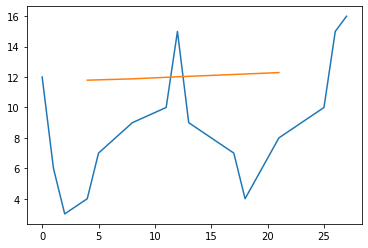

In [58]:
plt.plot(raw_data[:, 0], raw_data[:, 1])
x = []
y = []
index = 0
index_pred = 0
while index + data_len + data_label_len < len(raw_data):
    x.append(raw_data[index + data_len, 0])
    y.append(pred[index_pred, 1])
    index += window_size
    index_pred += 1
plt.plot(x, y)
print(x, y, len(raw_data))